In [107]:
%%capture capt
!pip install lifelines
!pip install tqdm
from tqdm import tqdm
import numpy as np

In [2]:
import pandas as pd
hospit_non_chr=pd.read_csv("base_hospit_non_chr_anonyme.csv")
hospit_full_hospit=pd.read_csv("base_full_hospit_anonyme.csv")
consommant=pd.read_csv("consommant_anonyme.csv")
patient=pd.read_csv("patient_anonyme.csv")

/tmp/ipykernel_132/1509498775.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  hospit_non_chr=pd.read_csv("base_hospit_non_chr_anonyme.csv")
/tmp/ipykernel_132/1509498775.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  hospit_full_hospit=pd.read_csv("base_full_hospit_anonyme.csv")


In [3]:
hospit_non_chr

,RSA_NUM,ETA_NUM,EXE_SOI_DTD,SEJ_NBJ,GRG_GHM,DGN_PAL,DGN_REL,BEN_NIR_IDT,CHOC,HEMOD,CHIMIO,Radiotherapie
0,144689,310781406,2011-11-22,2.0,05K051,I2100,NaN,P0,0,0,0,0
1,2763,110780061,2011-11-24,8.0,05M042,I21000,NaN,P0,0,0,0,0
2,15548,110780061,2011-12-08,0.0,05M16T,I255,NaN,P0,0,0,0,0
3,5260,110780061,2012-03-04,1.0,05M09T,I501,NaN,P0,0,0,0,0
4,112258,310781406,2012-03-05,7.0,05M092,I501,NaN,P0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87880,16969,130784713,2013-02-21,30.0,04M174,J91,NaN,P24308,0,0,0,0
87881,15396,810000331,2010-12-18,17.0,08C322,S8221,NaN,P24310,0,0,0,0
87882,4738,810000331,2011-01-07,0.0,08C14J,Z470,NaN,P24310,0,0,0,0
87883,14458,810000331,2011-01-26,7.0,08C322,S8221,NaN,P24310,0,0,0,0


In [4]:
patient

,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT
0,2011-11-22,0,1949,11,1,NaN,P0
1,2013-12-05,0,1929,14,2,2015-03,P6
2,2015-07-02,0,1967,54,2,2015-08,P8
3,2011-05-19,0,1959,974,1,NaN,P13
4,2010-03-18,0,1947,76,1,NaN,P16
...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12,P24302
10048,2012-02-09,0,1927,61,1,2017-05,P24303
10049,2010-07-27,0,1924,999,1,2010-08,P24304
10050,2011-11-25,0,1925,13,2,2013-03,P24308


In [5]:
patient["date_h0"]=pd.to_datetime(patient["date_h0"])
patient["dte_deces"]=pd.to_datetime(patient["dte_deces"])

In [6]:
patient

,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT
0,2011-11-22,0,1949,11,1,NaT,P0
1,2013-12-05,0,1929,14,2,2015-03-01,P6
2,2015-07-02,0,1967,54,2,2015-08-01,P8
3,2011-05-19,0,1959,974,1,NaT,P13
4,2010-03-18,0,1947,76,1,NaT,P16
...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12-01,P24302
10048,2012-02-09,0,1927,61,1,2017-05-01,P24303
10049,2010-07-27,0,1924,999,1,2010-08-01,P24304
10050,2011-11-25,0,1925,13,2,2013-03-01,P24308


In [7]:
patient["Nb_survie"]=patient["dte_deces"]-patient["date_h0"]
patient["Mort"]= [x.days>0 for x in patient["Nb_survie"]]
#patient=patient.drop(columns=["Survie"])

In [8]:
patient

,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT,Nb_survie,Mort
0,2011-11-22,0,1949,11,1,NaT,P0,NaT,False
1,2013-12-05,0,1929,14,2,2015-03-01,P6,451 days,True
2,2015-07-02,0,1967,54,2,2015-08-01,P8,30 days,True
3,2011-05-19,0,1959,974,1,NaT,P13,NaT,False
4,2010-03-18,0,1947,76,1,NaT,P16,NaT,False
...,...,...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12-01,P24302,296 days,True
10048,2012-02-09,0,1927,61,1,2017-05-01,P24303,1908 days,True
10049,2010-07-27,0,1924,999,1,2010-08-01,P24304,5 days,True
10050,2011-11-25,0,1925,13,2,2013-03-01,P24308,462 days,True


In [10]:
patient


,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT,Nb_survie,Mort
0,2011-11-22,0,1949,11,1,NaT,P0,2596 days,False
1,2013-12-05,0,1929,14,2,2015-03-01,P6,451 days,True
2,2015-07-02,0,1967,54,2,2015-08-01,P8,30 days,True
3,2011-05-19,0,1959,974,1,NaT,P13,2783 days,False
4,2010-03-18,0,1947,76,1,NaT,P16,3210 days,False
...,...,...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12-01,P24302,296 days,True
10048,2012-02-09,0,1927,61,1,2017-05-01,P24303,1908 days,True
10049,2010-07-27,0,1924,999,1,2010-08-01,P24304,5 days,True
10050,2011-11-25,0,1925,13,2,2013-03-01,P24308,462 days,True


In [13]:
hospit_full_hospit

,RSA_NUM,ETA_NUM,EXE_SOI_DTD,SEJ_NBJ,GRG_GHM,DGN_PAL,DGN_REL,BEN_NIR_IDT,CHOC,HEMOD,CHIMIO,Radiotherapie,Mort,Nb_survie
0,144689,310781406,2011-11-22,2.0,05K051,I2100,NaN,P0,0,0,0,0,False,2596
1,2763,110780061,2011-11-24,8.0,05M042,I21000,NaN,P0,0,0,0,0,False,2596
2,15548,110780061,2011-12-08,0.0,05M16T,I255,NaN,P0,0,0,0,0,False,2596
3,5260,110780061,2012-03-04,1.0,05M09T,I501,NaN,P0,0,0,0,0,False,2596
4,112258,310781406,2012-03-05,7.0,05M092,I501,NaN,P0,0,0,0,0,False,2596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156331,16969,130784713,2013-02-21,30.0,04M174,J91,NaN,P24308,0,0,0,0,True,462
156332,15396,810000331,2010-12-18,17.0,08C322,S8221,NaN,P24310,0,0,0,0,False,2935
156333,4738,810000331,2011-01-07,0.0,08C14J,Z470,NaN,P24310,0,0,0,0,False,2935
156334,14458,810000331,2011-01-26,7.0,08C322,S8221,NaN,P24310,0,0,0,0,False,2935


In [46]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], duration_col='Nb_survie', event_col='Mort')

cph.print_summary()  # access the individual results using cph.summary


<lifelines.CoxPHFitter: fitted with 156336 total observations, 60920 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
      baseline estimation = breslow
   number of observations = 156336
number of events observed = 95416
   partial log-likelihood = -1074104.48
         time fit was run = 2023-01-25 09:32:41 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
CHOC            0.27       1.30       0.06             0.14             0.39                 1.15                 1.48
HEMOD           0.08       1.09       0.01             0.07             0.10                 1.07                 1.10
CHIMIO          0.55       1.74       0.01             0.53             0.58                 1.70                 1.78
Radiotherapie   0.22       1.25       0.02             0.19             0.26                 1.20                 1.29

                cmp to     z      p   -log2(p)
covariate                                     
CHOC              0.00  4.23 <0.005      15.39
HEMOD             0.00 11.97 <0.005     107.23
CHIMIO            0.00 46.26 <0.005        inf
Radiotherapie     0.00 12.34 <0.005     113.82
---
Concordance = 0.52
Partial AIC = 2148216.97
log-likelihood ratio test = 1963.34 on 4 df
-log2(p) of ll-ratio test = inf

<AxesSubplot: >

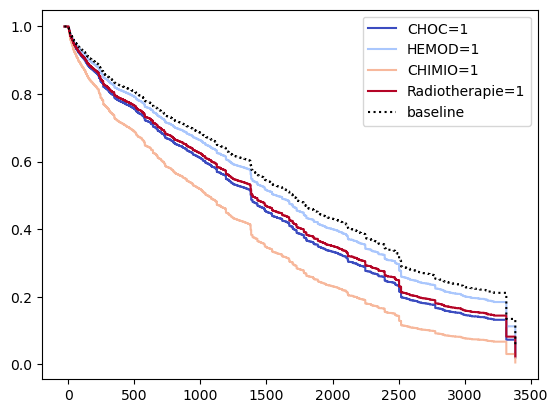

In [15]:
cph.plot_partial_effects_on_outcome(covariates=['CHOC','HEMOD','CHIMIO','Radiotherapie'], values=[(1,0,0,0),(0,1,0,0),(0,0,1,0),(0,0,0,1)], cmap='coolwarm')
# cph.plot_partial_effects_on_outcome(covariates=['HEMOD','CHIMIO','Radiotherapie'], values=[(1,0,0),(0,1,0),(0,0,1)], cmap='coolwarm')

In [16]:
cph.params_

covariate
CHOC             0.266165
HEMOD            0.084727
CHIMIO           0.554182
Radiotherapie    0.220436
Name: coef, dtype: float64

In [17]:
cph.baseline_hazard_

,baseline hazard
-30.0,0.000000
-29.0,0.000000
-28.0,0.000000
-27.0,0.000000
-26.0,0.000000
...,...
3284.0,0.000000
3285.0,0.000000
3286.0,0.000000
3316.0,0.491312


<AxesSubplot: xlabel='log(HR) (95% CI)'>

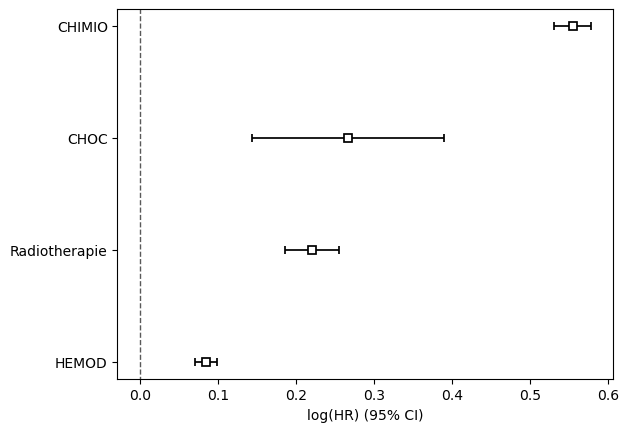

In [18]:
cph.plot()

In [ ]:
cph.check_assumptions(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], p_value_threshold=0.05, show_plots=True)

In [20]:
#Avec Stratification
cph = CoxPHFitter()
cph.fit(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], duration_col='Nb_survie', event_col='Mort',strata=['CHOC','HEMOD','CHIMIO','Radiotherapie'])

cph.print_summary()  # access the individual results using cph.summary


<lifelines.CoxPHFitter: fitted with 156336 total observations, 60920 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
                   strata = ['CHOC', 'HEMOD', 'CHIMIO', 'Radiotherapie']
      baseline estimation = breslow
   number of observations = 156336
number of events observed = 95416
   partial log-likelihood = -973851.03
         time fit was run = 2023-01-25 09:23:42 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ cmp to,  z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 1947702.05
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

<AxesSubplot: xlabel='log(HR) (95% CI)'>

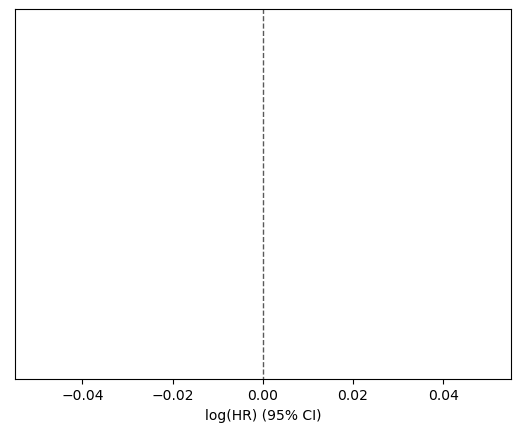

In [21]:
cph.plot()

In [22]:
cph.params_

Series([], Name: coef, dtype: float64)

In [23]:
cph.baseline_hazard_

,"(0, 0, 0, 0)","(0, 0, 0, 1)","(0, 0, 1, 0)","(0, 1, 0, 0)","(1, 0, 0, 0)"
-30.0,0.000000,0.0,0.0,0.0,0.0
-29.0,0.000000,0.0,0.0,0.0,0.0
-28.0,0.000000,0.0,0.0,0.0,0.0
-27.0,0.000000,0.0,0.0,0.0,0.0
-26.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3284.0,0.000000,0.0,0.0,0.0,0.0
3285.0,0.000000,0.0,0.0,0.0,0.0
3286.0,0.000000,0.0,0.0,0.0,0.0
3316.0,0.454545,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='log(HR) (95% CI)'>

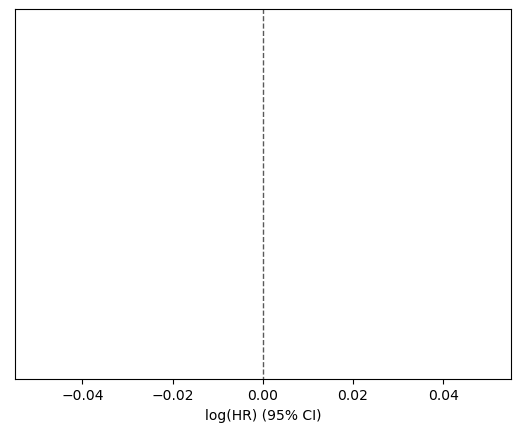

In [24]:
cph.plot()

In [25]:
cph.check_assumptions(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [47]:
#Test : https://timeseriesreasoning.com/contents/schoenfeld-residuals/
cph = CoxPHFitter()
cph.fit(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], duration_col='Nb_survie', event_col='Mort')

cph.print_summary()  # access the individual results using cph.summary

<lifelines.CoxPHFitter: fitted with 156336 total observations, 60920 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
      baseline estimation = breslow
   number of observations = 156336
number of events observed = 95416
   partial log-likelihood = -1074104.48
         time fit was run = 2023-01-25 09:33:07 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
CHOC            0.27       1.30       0.06             0.14             0.39                 1.15                 1.48
HEMOD           0.08       1.09       0.01             0.07             0.10                 1.07                 1.10
CHIMIO          0.55       1.74       0.01             0.53             0.58                 1.70                 1.78
Radiotherapie   0.22       1.25       0.02             0.19             0.26                 1.20                 1.29

                cmp to     z      p   -log2(p)
covariate                                     
CHOC              0.00  4.23 <0.005      15.39
HEMOD             0.00 11.97 <0.005     107.23
CHIMIO            0.00 46.26 <0.005        inf
Radiotherapie     0.00 12.34 <0.005     113.82
---
Concordance = 0.52
Partial AIC = 2148216.97
log-likelihood ratio test = 1963.34 on 4 df
-log2(p) of ll-ratio test = inf

In [48]:
#Use Lifelines to calculate the variance scaled Schoenfeld residuals for all regression variables in one go:
scaled_schoenfeld_residuals = cph.compute_residuals(training_dataframe=hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], kind='scaled_schoenfeld')
print(scaled_schoenfeld_residuals)

covariate      CHOC     HEMOD   CHIMIO  Radiotherapie
6939      -2.041376 -1.884643 -2.28004       -2.03055
15004     -2.041376 -1.884643 -2.28004       -2.03055
15005     -2.041376 -1.884643 -2.28004       -2.03055
15006     -2.041376 -1.884643 -2.28004       -2.03055
15007     -2.041376 -1.884643 -2.28004       -2.03055
...             ...       ...      ...            ...
78784      0.000000  0.000000  0.00000        0.00000
78785      0.000000  0.000000  0.00000        0.00000
78786      0.000000  0.000000  0.00000        0.00000
78787      0.000000  0.000000  0.00000        0.00000
78788      0.000000  0.000000  0.00000        0.00000

[95416 rows x 4 columns]


Pour la variable CHOC:


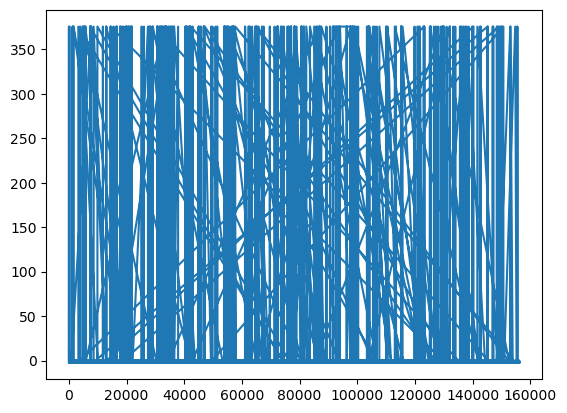

(array([189.65559219]), array([2.45026756e-21]), array([189.62834088]), array([2.47719653e-21]))
p-valeur du test de Ljung-Box: [2.45026756e-21]
p-valeur du test de Box-Pierce test: [2.45026756e-21]
Pour la variable HEMOD:


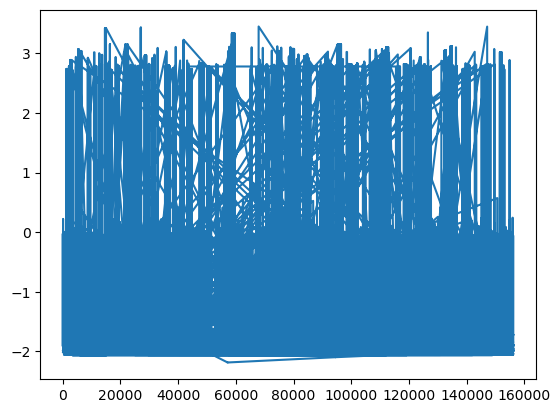

(array([2276465.39490573]), array([0.]), array([2275976.55939944]), array([0.]))
p-valeur du test de Ljung-Box: [0.]
p-valeur du test de Box-Pierce test: [0.]
Pour la variable CHIMIO:


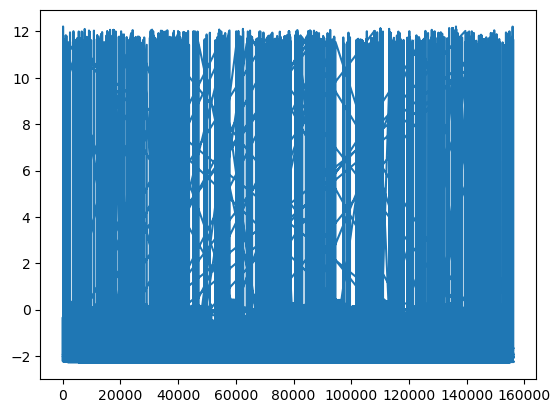

(array([402737.70218163]), array([0.]), array([402693.84021826]), array([0.]))
p-valeur du test de Ljung-Box: [0.]
p-valeur du test de Box-Pierce test: [0.]
Pour la variable Radiotherapie:


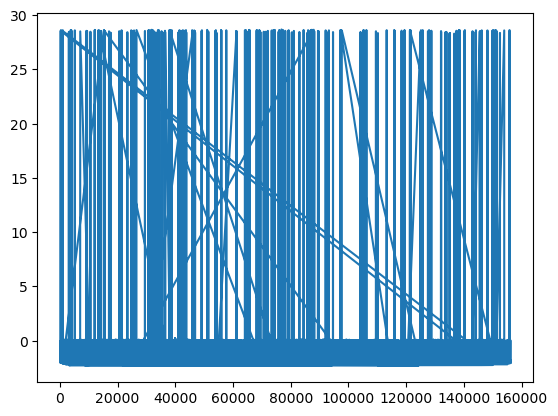

(array([610557.46549599]), array([0.]), array([610495.60354835]), array([0.]))
p-valeur du test de Ljung-Box: [0.]
p-valeur du test de Box-Pierce test: [0.]


In [67]:
from matplotlib import pyplot as plt
import statsmodels.stats.diagnostic as diag
Variables=['CHOC','HEMOD','CHIMIO','Radiotherapie']
for variable in Variables:
    print('Pour la variable ' + str(variable) + ':')
    #Let's plot the residuals for AGE against time:
    plt.plot(scaled_schoenfeld_residuals.index, scaled_schoenfeld_residuals[variable])
    plt.show()
    #Run the Ljung-Box test to test for auto-correlation in residuals up to lag 40
    result=diag.acorr_ljungbox(x=scaled_schoenfeld_residuals[variable], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)
    print(result)
    print('p-valeur du test de Ljung-Box: ' + str(result[1]))
    print('p-valeur du test de Box-Pierce test: ' + str(result[1]))

In [68]:
from lifelines.statistics import proportional_hazard_test
#Run the CPHFitter.proportional_hazards_test on the scaled Schoenfeld residuals
proportional_hazard_test(fitted_cox_model=cph, training_df=hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], time_transform='log', precomputed_residuals=scaled_schoenfeld_residuals)

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = log
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 156336 total observations, 60920 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic      p  -log2(p)
CHIMIO                 231.31 <0.005    171.12
CHOC                    86.93 <0.005     66.27
HEMOD                 4715.18 <0.005       inf
Radiotherapie          439.71 <0.005    321.90

In [69]:
#Autre test : https://nextjournal.com/survivalanalysis/test-PH-assumption
## Test assumption
results = proportional_hazard_test(cph, hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], time_transform='rank')

In [70]:
results

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 156336 total observations, 60920 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic      p  -log2(p)
CHIMIO                 122.11 <0.005     91.89
CHOC                    34.77 <0.005     28.01
HEMOD                 5824.24 <0.005       inf
Radiotherapie          377.89 <0.005    277.20

In [ ]:
## Plot scaled Schoenfeld residuals
cph.check_assumptions(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], p_value_threshold=0.05, show_plots=True, advice=True)

<AxesSubplot: xlabel='timeline'>

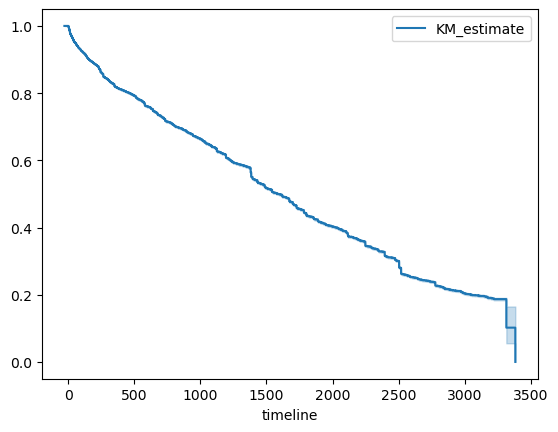

In [101]:
#Autre test: https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d
from lifelines import KaplanMeierFitter
#hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']]
T=hospit_full_hospit['Nb_survie']
E=hospit_full_hospit['Mort']
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

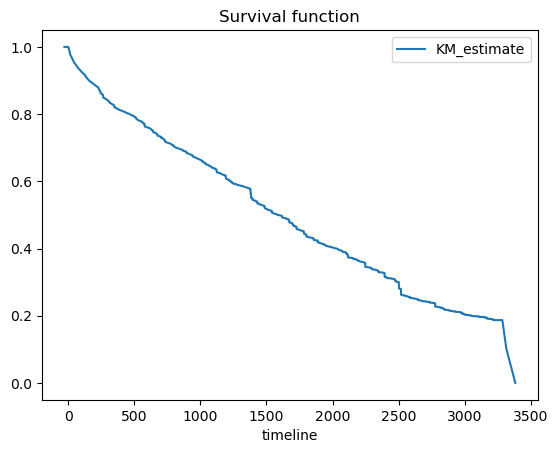

In [102]:
kmf.survival_function_.plot()
plt.title('Survival function')

<AxesSubplot: xlabel='timeline'>

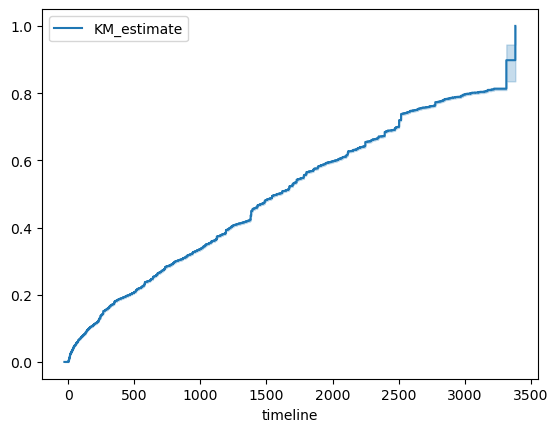

In [103]:
kmf.plot_cumulative_density()

In [104]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter
# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()
# Fit to data
for model in [wb, ex, log, loglogis]:
    model.fit(durations = hospit_full_hospit["Nb_survie"]+30.001, event_observed = hospit_full_hospit["Mort"])
# Print AIC
print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for LogLogisticFitter is 1665263.7134060147


In [ ]:
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], duration_col=hospit_full_hospit['Nb_survie'], event_col=hospit_full_hospit['Mort'])
weibull_aft.print_summary(3)

In [ ]:
print(weibull_aft.median_survival_time_)
print(weibull_aft.mean_survival_time_)

In [ ]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot()

In [ ]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot_partial_effects_on_outcome('age', range(50, 80, 10), cmap='coolwarm')